In [1]:
import pandas as pd
prefix = '/home/jovyan/work/profile/server/'

loss_sklearn_mnist_small = pd.read_json(f'{prefix}sklearn-MNIST-FedAvg-false-20-small/history_losses_distributed.jl', lines=True)
loss_sklearn_mnist_medium = pd.read_json(f'{prefix}sklearn-MNIST-FedAvg-false-20-medium/history_losses_distributed.jl', lines=True)
loss_sklearn_mnist_large = pd.read_json(f'{prefix}sklearn-MNIST-FedAvg-false-20-large/history_losses_distributed.jl', lines=True)

loss_tensorflow_mnist_small = pd.read_json(f'{prefix}tensorflow-MNIST-FedAvg-false-20-small/history_losses_distributed.jl', lines=True)
loss_tensorflow_mnist_medium = pd.read_json(f'{prefix}tensorflow-MNIST-FedAvg-false-20-medium/history_losses_distributed.jl', lines=True)
loss_tensorflown_mnist_large = pd.read_json(f'{prefix}tensorflow-MNIST-FedAvg-false-20-large/history_losses_distributed.jl', lines=True)

# loss_sklearn_mnist_20 = pd.read_json(f'{prefix}sklearn-MNIST-FedAvg-false-20/history_losses_distributed.jl', lines=True)
# loss_sklearn_mnist = pd.read_json(f'{prefix}sklearn-MNIST-FedAvg-false/history_losses_distributed.jl', lines=True)
# loss_tensorflow_mnist_20 = pd.read_json(f'{prefix}sklearn-MNIST-FedAvg-false-20/history_losses_distributed.jl', lines=True)
# loss_tensorflow_mnist = pd.read_json(f'{prefix}sklearn-MNIST-FedAvg-false/history_losses_distributed.jl', lines=True)


<Axes: >

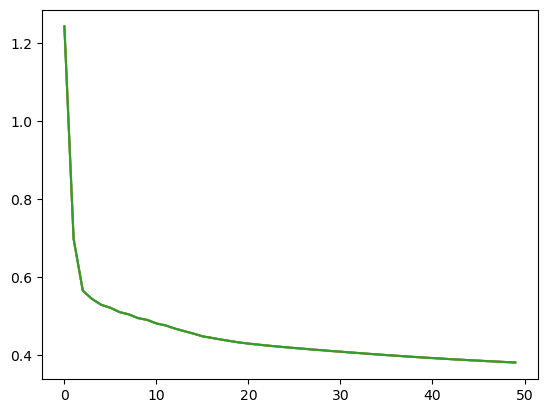

In [2]:
loss_sklearn_mnist_small.loss[:].plot()
loss_sklearn_mnist_medium.loss[:].plot()
loss_sklearn_mnist_large.loss[:].plot()

<Axes: >

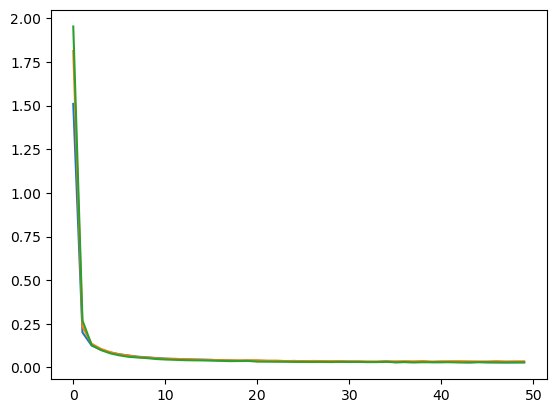

In [3]:
loss_tensorflow_mnist_small.loss[:].plot()
loss_tensorflow_mnist_medium.loss[:].plot()
loss_tensorflown_mnist_large.loss[:].plot()

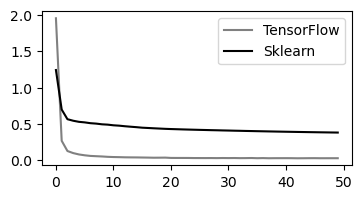

In [4]:
loss_tensorflown_mnist_large.loss[:].plot( color="gray", figsize=(4,2), label="TensorFlow")
loss_sklearn_mnist_large.loss[:].plot( color="black", figsize=(4,2), label="Sklearn").legend()

In [5]:
accur['sklearn-small'].accuracy.mean(axis=1).plot( color="black", figsize=(4,2), label="TensorFlow")
accur['tensorflow-small'].accuracy.mean(axis=1).plot( color="gray", figsize=(4,2), label="Sklearn").legend()

NameError: name 'accur' is not defined

In [6]:
(accur['sklearn-small'].accuracy.mean(axis=1)/accur['sklearn-small'].train.max(axis=1)).plot()
(accur['sklearn-large'].accuracy.mean(axis=1)/accur['sklearn-large'].train.max(axis=1)).plot()
(accur['tensorflow-small'].accuracy.mean(axis=1)/accur['tensorflow-small'].train.max(axis=1)).plot()
(accur['tensorflow-large'].accuracy.mean(axis=1)/accur['tensorflow-large'].train.max(axis=1)).plot()



NameError: name 'accur' is not defined

In [15]:
accur.keys()

dict_keys(['sklearn-small', 'sklearn-large', 'tensorflow-small', 'tensorflow-large'])

In [8]:
loss_tensorflow_mnist_20.loss[:50].plot()
loss_tensorflow_mnist.loss[:50].plot()

NameError: name 'loss_tensorflow_mnist_20' is not defined

In [9]:
prefix = '/home/jovyan/work'
accur = {
    'sklearn-small' :None,
    'sklearn-large' : None,
    # 'sklearn-medium' :None,
    'tensorflow-small' :None,
    'tensorflow-large' : None,
    # 'tensorflow-medium' :None,
    
}
accur_sklearn = None
accur_tensorflow = None
for framework in accur:
    nodes = 10 #30 if '20' not in framework else 20
    frame_name =  'tensorflow' if 'tensorflow' in framework else 'sklearn'
    for i in range(nodes):
        print(f"{prefix}/profile/clients/{framework}/{i}-{framework}/profile.jl")
        temp = pd.read_json(f"{prefix}/profile/clients/{framework}/{i}-{frame_name}-MNIST-20/profile.jl", lines=True)
        if accur[framework] is None:
            accur[framework] = temp[:50]
        else:
            accur[framework] = pd.concat([accur[framework],temp],axis=1)
        
    # accur_tensorflow = pd.read_json(f"{prefix}/profile/clients/tensorflow-MNIST/{i}-tensorflow-MNIST/profile.jl", lines=True)

# accur_sklearn_20 = pd.read_json(f"{prefix}/profile/clients/sklearn-MNIST-20/0-sklearn-MNIST-20/profile.jl", lines=True)
# accur_tensorflow_20 = pd.read_json(f"{prefix}/profile/clients/tensorflow-MNIST-20/0-tensorflow-MNIST-20/profile.jl", lines=True)

/home/jovyan/work/profile/clients/sklearn-small/0-sklearn-small/profile.jl
/home/jovyan/work/profile/clients/sklearn-small/1-sklearn-small/profile.jl
/home/jovyan/work/profile/clients/sklearn-small/2-sklearn-small/profile.jl
/home/jovyan/work/profile/clients/sklearn-small/3-sklearn-small/profile.jl
/home/jovyan/work/profile/clients/sklearn-small/4-sklearn-small/profile.jl
/home/jovyan/work/profile/clients/sklearn-small/5-sklearn-small/profile.jl
/home/jovyan/work/profile/clients/sklearn-small/6-sklearn-small/profile.jl
/home/jovyan/work/profile/clients/sklearn-small/7-sklearn-small/profile.jl
/home/jovyan/work/profile/clients/sklearn-small/8-sklearn-small/profile.jl
/home/jovyan/work/profile/clients/sklearn-small/9-sklearn-small/profile.jl
/home/jovyan/work/profile/clients/sklearn-large/0-sklearn-large/profile.jl
/home/jovyan/work/profile/clients/sklearn-large/1-sklearn-large/profile.jl
/home/jovyan/work/profile/clients/sklearn-large/2-sklearn-large/profile.jl
/home/jovyan/work/profile

In [10]:
refix = '/home/jovyan/work'
profile_files = dict(
large_workers_tensorflow = "/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/{i}-tensorflow-MNIST-10-2023",
small_workers_tensorflow = "/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023-small-workers/{i}-tensorflow-MNIST-10-2023",
large_workers_sklearn = "/home/jovyan/work/profile/clients/sklearn-MNIST-10/{i}-sklearn-MNIST-10",
small_workers_sklearn = "/home/jovyan/work/profile/clients/sklearn-MNIST-10-2023-small-workers/{i}-sklearn-MNIST-10-2023"
)

nodes = 10
accur = {
}

accur_sklearn = None
accur_tensorflow = None
for framework in profile_files:
    nodes = 10

    for i in range(nodes):
        print(profile_files[framework].format(i=i))
        temp = pd.read_json(profile_files[framework].format(i=i) + "/profile.jl", lines=True)
        if accur.get(framework) is None:
            accur[framework] = temp[:50]
        else:
            accur[framework] = pd.concat([accur[framework],temp], axis=1)
        

/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/0-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/1-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/2-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/3-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/4-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/5-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/6-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/7-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/8-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023/9-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensorflow-MNIST-10-2023-small-workers/0-tensorflow-MNIST-10-2023
/home/jovyan/work/profile/clients/tensor

Text(0.5, 1.0, 'Training Duration')

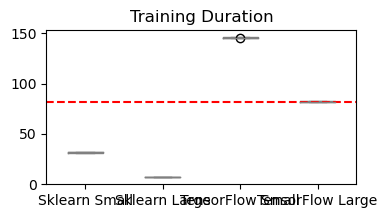

In [22]:
accur.keys()
import matplotlib.pyplot as plt
avg_train = 57.11
df=pd.concat([
    accur['small_workers_sklearn'].timestamp.diff().timestamp[1:].apply(lambda x: x.apply(lambda x: int(x.seconds))).mean(),
    # accur['sklearn-medium'].train[1:].mean(axis=1),
    accur['large_workers_sklearn'].timestamp.diff().timestamp[1:].apply(lambda x: x.apply(lambda x: int(x.seconds))).mean(),
    accur['small_workers_tensorflow'].timestamp.diff().timestamp[1:].apply(lambda x: x.apply(lambda x: int(x.seconds))).mean(),
    # accur['tensorflow-medium'].train[1:].mean(axis=1),
    accur['large_workers_tensorflow'].timestamp.diff().timestamp[1:].apply(lambda x: x.apply(lambda x: int(x.seconds))).mean(),],axis=1)



df.columns = ['Sklearn Small', 'Sklearn Large','TensorFlow Small', 'TensorFlow Large']
ax = df.plot.box(color='gray', figsize=(4,2))
plt.axhline(accur['large_workers_tensorflow'].timestamp.diff().timestamp[1:].apply(lambda x: x.apply(lambda x: int(x.seconds))).mean().mean(), c='r', ls='--')
ax.set_title("Training Duration")

In [ ]:
accur.keys()
import matplotlib.pyplot as plt
avg_train = 57.11
df=pd.concat([
    accur['small_workers_sklearn'].timestamp.diff().timestamp[1:].apply(lambda x: x.apply(lambda x: int(x.seconds))).mean(),
    # accur['sklearn-medium'].train[1:].mean(axis=1),
    accur['large_workers_sklearn'].timestamp.diff().timestamp[1:].apply(lambda x: x.apply(lambda x: int(x.seconds))).mean(),
    accur['small_workers_tensorflow'].timestamp.diff().timestamp[1:].apply(lambda x: x.apply(lambda x: int(x.seconds))).mean(),
    # accur['tensorflow-medium'].train[1:].mean(axis=1),
    accur['large_workers_tensorflow'].timestamp.diff().timestamp[1:].apply(lambda x: x.apply(lambda x: int(x.seconds))).mean(),],axis=1)



df.columns = ['Sklearn Small', 'Sklearn Large','TensorFlow Small', 'TensorFlow Large']
ax = df.plot.box(color='gray', figsize=(4,2))
plt.axhline(accur['large_workers_tensorflow'].timestamp.diff().timestamp[1:].apply(lambda x: x.apply(lambda x: int(x.seconds))).mean().mean(), c='r', ls='--')
ax.set_title("Training Duration")

In [18]:
df

,small,large,small,large
timestamp,31.326531,7.102041,145.448980,82.632653
timestamp,31.653061,7.081633,145.795918,81.775510
timestamp,31.306122,7.183673,145.612245,82.673469
timestamp,31.408163,7.122449,145.734694,81.816327
timestamp,31.714286,7.000000,145.959184,82.653061
timestamp,31.510204,7.020408,145.571429,81.857143
timestamp,31.734694,7.163265,145.795918,81.795918
timestamp,31.612245,6.918367,145.857143,81.795918
timestamp,31.673469,7.142857,145.040816,81.836735
timestamp,31.306122,7.122449,145.714286,81.897959


In [24]:
prefix = '/home/jovyan/work/'
metrics = {
}

profile_files = dict(
large_workers_tensorflow = "/home/jovyan/work/metrics/tensorflow-MNIST-10-2023/client-{i}-MNIST-tensorflow-FedAvg-false-10-2023.csv",
small_workers_tensorflow = "/home/jovyan/work/metrics/tensorflow-MNIST-10-2023-small-workers/client-{i}-MNIST-tensorflow-FedAvg-false-10-2023.csv",
large_workers_sklearn = "/home/jovyan/work/metrics/sklearn-MNIST-10-2023/client-{i}-MNIST-sklearn-FedAvg-false-10-2023.csv",
small_workers_sklearn = "/home/jovyan/work/metrics/sklearn-MNIST-10-2023-small-workers/client-{i}-MNIST-sklearn-FedAvg-false-10-2023.csv",
)

accur_sklearn = None
accur_tensorflow = None
for framework in profile_files:
    nodes = 10 #30 if '20' not in framework else 20
    frame_name =  'tensorflow' if 'tensorflow' in framework else 'sklearn'
    for i in range(nodes):
        # print(f"{prefix}/metrics/{frame_name}/client-{i}-{framework}/profile.csv")
        try:
            temp = pd.read_csv(profile_files[framework].format(i=i))
        except Exception:
            print(profile_files[framework].format(i=i))
            continue
        if metrics.get(framework) is None:
            metrics[framework] = temp
        else:
            metrics[framework] = pd.concat([metrics[framework],temp],axis=1)

Text(0.5, 1.0, 'CPU Utilization')

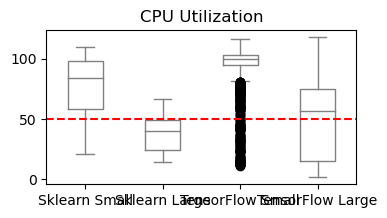

In [27]:
df=pd.concat([
    metrics['small_workers_sklearn'].cpu_util[1:].mean(axis=1),
    metrics['large_workers_sklearn'].cpu_util[1:].mean(axis=1),
    # metrics['sklearn-medium'].cpu_util[1:].mean(axis=1),
    metrics['small_workers_tensorflow'].cpu_util[1:].mean(axis=1),
    metrics['large_workers_tensorflow'].cpu_util[1:].mean(axis=1),
    # metrics['tensorflow-medium'].cpu_util[1:].mean(axis=1),

],axis=1)



df.columns = ['Sklearn Small', 'Sklearn Large','TensorFlow Small', 'TensorFlow Large']
ax = df.plot.box(color='gray', figsize=(4,2))
plt.axhline(metrics['large_workers_tensorflow'].cpu_util[1:].mean(axis=1).mean(), c='r', ls='--')
ax.set_title("CPU Utilization")

Text(0.5, 1.0, 'Memory')

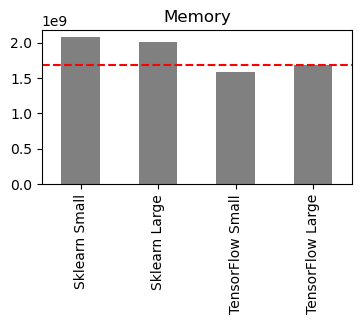

In [51]:
df=pd.concat([
    metrics['small_workers_sklearn'].memory[1:].mean(axis=1),
    metrics['large_workers_sklearn'].memory[1:].mean(axis=1),
    # metrics['sklearn-medium'].cpu_util[1:].mean(axis=1),
    metrics['small_workers_tensorflow'].memory[1:].mean(axis=1),
    metrics['large_workers_tensorflow'].memory[1:].mean(axis=1),
    # metrics['tensorflow-medium'].cpu_util[1:].mean(axis=1),

],axis=1)



df.columns = ['Sklearn Small', 'Sklearn Large','TensorFlow Small', 'TensorFlow Large']
ax = df.mean().plot.bar(color='gray', figsize=(4,2))
plt.axhline(metrics['large_workers_tensorflow'].memory[1:].mean(axis=1).mean(), c='r', ls='--')
ax.set_title("Memory")

Text(0.5, 1.0, 'Network Data Recieve')

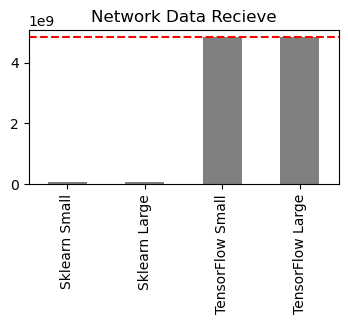

In [47]:
df=pd.concat([
    metrics['small_workers_sklearn'].network_rx_flnet.diff()[1:].sum(axis=1),
    metrics['large_workers_sklearn'].network_rx_flnet.diff()[1:].sum(axis=1),
    # metrics['sklearn-medium'].cpu_util[1:].mean(axis=1),
    metrics['small_workers_tensorflow'].network_rx_flnet.diff()[1:].sum(axis=1),
    metrics['large_workers_tensorflow'].network_rx_flnet.diff()[1:].sum(axis=1),
    # metrics['tensorflow-medium'].cpu_util[1:].mean(axis=1),

],axis=1)



df.columns = ['Sklearn Small', 'Sklearn Large','TensorFlow Small', 'TensorFlow Large']
ax = df.sum().plot.bar(color='gray', figsize=(4,2))
plt.axhline(metrics['large_workers_tensorflow'].network_rx_flnet.diff()[1:].sum(axis=1).sum(), c='r', ls='--')
ax.set_title("Network Data Recieve")

Text(0.5, 1.0, 'Network Data Transmit')

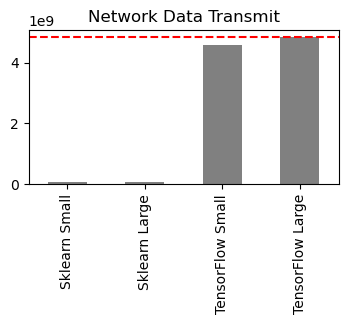

In [49]:
df=pd.concat([
    metrics['small_workers_sklearn'].network_tx_flnet.diff()[1:].sum(axis=1),
    metrics['large_workers_sklearn'].network_tx_flnet.diff()[1:].sum(axis=1),
    # metrics['sklearn-medium'].cpu_util[1:].mean(axis=1),
    metrics['small_workers_tensorflow'].network_tx_flnet.diff()[1:].sum(axis=1),
    metrics['large_workers_tensorflow'].network_tx_flnet.diff()[1:].sum(axis=1),
    # metrics['tensorflow-medium'].cpu_util[1:].mean(axis=1),

],axis=1)



df.columns = ['Sklearn Small', 'Sklearn Large','TensorFlow Small', 'TensorFlow Large']
ax = df.sum().plot.bar(color='gray', figsize=(4,2))
plt.axhline(metrics['large_workers_tensorflow'].network_tx_flnet.diff()[1:].sum(axis=1).sum(), c='r', ls='--')
ax.set_title("Network Data Transmit")

In [30]:
metrics['small_workers_sklearn']

,Unnamed: 0,network_rx_flnet,timestamp,disk_reads,memory,disk_writes,network_tx_flnet,cpu,count,cpu_util,...,network_rx_flnet,timestamp,disk_reads,memory,disk_writes,network_tx_flnet,cpu,count,cpu_util,memory_util
0,0,648.0,1675081554483,0.0,2.609152e+06,0.0,0.0,NaN,0,NaN,...,648.0,1675081554483,0.0,2.461696e+06,0.0,0.0,NaN,0,NaN,0.057316
1,1,648.0,1675081559483,0.0,1.816330e+08,0.0,0.0,9.306554,1,NaN,...,648.0,1675081559483,0.0,2.864415e+08,0.0,0.0,15.473919,1,NaN,6.669235
2,2,648.0,1675081564483,0.0,3.030057e+08,0.0,0.0,20.664747,2,81.129950,...,648.0,1675081564483,0.0,3.029279e+08,0.0,0.0,26.381149,2,77.908781,7.053089
3,3,648.0,1675081569483,0.0,3.030344e+08,0.0,0.0,38.608051,3,128.166457,...,648.0,1675081569483,0.0,3.029484e+08,0.0,0.0,41.569863,3,108.490814,7.053566
4,4,690.0,1675081574483,0.0,3.767091e+08,0.0,0.0,47.956529,4,66.774843,...,816.0,1675081574483,0.0,3.195085e+08,0.0,0.0,56.250814,4,104.863940,7.439137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,403,6495454.0,1675083569483,0.0,2.056655e+09,0.0,6494386.0,3854.207492,403,NaN,...,6514365.0,1675083569483,0.0,2.180551e+09,0.0,6513297.0,3789.127647,403,NaN,NaN
404,404,6495454.0,1675083574483,0.0,2.056655e+09,0.0,6494386.0,3854.207492,404,NaN,...,6514365.0,1675083574483,0.0,2.180551e+09,0.0,6513297.0,3789.127647,404,NaN,NaN
405,405,6495454.0,1675083579483,0.0,2.056655e+09,0.0,6494386.0,3854.207492,405,NaN,...,6514365.0,1675083579483,0.0,2.180551e+09,0.0,6513297.0,3789.127647,405,NaN,NaN
406,406,6495454.0,1675083584483,0.0,2.056655e+09,0.0,6494386.0,3854.207492,406,NaN,...,6514365.0,1675083584483,0.0,2.180551e+09,0.0,6513297.0,3789.127647,406,NaN,NaN


In [28]:
metrics.keys()

dict_keys(['large_workers_tensorflow', 'small_workers_tensorflow'])

In [233]:
for framework in metrics:
    metrics[framework].cpu_util

In [107]:
server = pd.read_json(f"/home/jovyan/work/profile/server/tensorflow-MNIST-FedAvg-false-20-small/profile-Copy1.jl", lines=True)


In [108]:
server

,fit_round,timestamp
0,166.253133,2022-11-13 11:28:41.689811
1,145.457907,2022-11-13 11:31:16.745621
2,97.612400,2022-11-13 11:33:02.307404
3,93.087864,2022-11-13 11:34:42.964247
4,145.149167,2022-11-13 11:37:14.441842
5,99.132639,2022-11-13 11:39:01.540353
6,145.318970,2022-11-13 11:41:34.445672
7,95.150275,2022-11-13 11:43:21.910230
8,145.511931,2022-11-13 11:45:59.946673
9,99.326927,2022-11-13 11:47:46.518096


In [12]:
frame = {
    "network": 0.000001*(metrics["tensorflow-small"].network_tx_flnet.diff().mean(axis=1)+metrics["tensorflow-small"].network_rx_flnet.diff().mean(axis=1)),
    "cpu": metrics["tensorflow-small"].cpu_util.mean(axis=1),
    "timestamps": (metrics["tensorflow-small"].timestamp.mean(axis=1) - metrics["tensorflow-small"].timestamp.mean(axis=1).min())/1000
}
result = pd.DataFrame(frame)


# df = 100*metrics["tensorflow-small"].network_tx_flnet.diff()[450:550].mean(axis=1)/metrics["tensorflow-small"].network_tx_flnet.diff()[:100].max(axis=1).max()
# # df["timestamps"] = (metrics["tensorflow-small"].timestamp.mean(axis=1) - metrics["tensorflow-small"].timestamp.mean(axis=1).min())/1000

# ax = df.plot(figsize=(15,2), color="red", linestyle='--', label="network")


# # df2 = 100*metrics["tensorflow-small"].network_rx_flnet.diff().mean(axis=1)/metrics["tensorflow-small"].network_rx_flnet.diff().max(axis=1).max()
# # df2.plot(figsize=(15,3), ax=ax)

# metrics["tensorflow-small"].cpu_util[450:550].mean(axis=1).plot(figsize=(15,1.5),color="grey", ax=ax, label="cpu")
# ax.set_xlim(left=450, right=550)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

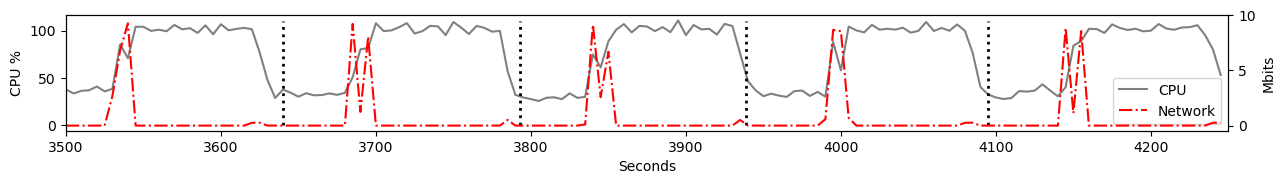

In [37]:
ax = result[700:850].plot(x='timestamps', y='cpu', figsize=(15,1.5), color = 'grey', label="CPU")
result[700:850].plot(x='timestamps',y='network',figsize=(15,1.5), color = 'red',  ax=ax, linestyle='-.',secondary_y=True, label="Network", mark_right=False)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(["CPU", "Network"])

vertical = (accur["tensorflow-small"].timestamp.min(axis=1) - accur["tensorflow-small"].timestamp.min(axis=1).min()).dt.total_seconds().astype(int)
vertical = vertical[vertical>=result[700:850].timestamps.min()][vertical<=result[700:850].timestamps.max()]
ax.set_xlim(left=result[700:701].timestamps.to_list()[0], right=result[850:851].timestamps.to_list()[0])
ax.set_xlabel("Seconds")

ax.vlines(vertical.to_list(), color='black',ymin=0, ymax=110, linestyle=':', lw=2)
fig = ax.get_figure()
ax = fig.get_axes()
ax[0].set_ylabel("CPU %")
ax[1].set_ylabel("Mbits")
ax[1].set_yticks([0,5,10])


700    3500.0
Name: timestamps, dtype: float64

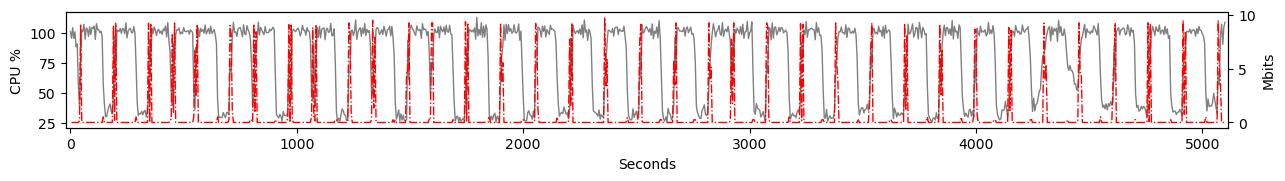

In [39]:
ax = result[:5000].plot(x='timestamps', y='cpu',figsize=(15,1.5), color = 'grey', legend=False, lw=1)
result[:5000].plot(x='timestamps',y='network',figsize=(15,1.5), color = 'red',  ax=ax, linestyle='-.', legend=False, lw=1, secondary_y=True)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# vertical = (accur["tensorflow-small"].timestamp.min(xis=1) - accur["tensorflow-small"].timestamp.min(axis=1).min()).dt.total_seconds().astype(int)
# vertical = vertical[vertical>=result[700:850].timestamps.min()][vertical<=result[700:850].timestamps.max()]
ax.set_xlim(left=result[0:1].timestamps.to_list()[0]-20, right=result[-2:-1].timestamps.to_list()[0]+20)

# ax.vlines([3500, 4260], color='black',ymin=0, ymax=110, lw=4)
# ax.vlines(vertical.to_list(), color='r',ymin=0, ymax=110, linestyle='-.', lw=2)
ax.set_xlabel("Seconds")
fig = ax.get_figure()
ax = fig.get_axes()
ax[0].set_ylabel("CPU %")
ax[1].set_ylabel("Mbits")
ax[1].set_yticks([0,5,10])

In [36]:
metrics

{'sklearn-small':      Unnamed: 0  network_rx_flnet       memory     timestamp  disk_reads   
 0           0.0             648.0  193531904.0  1.668334e+12         0.0  \
 1           1.0             648.0  302927872.0  1.668334e+12         0.0   
 2           2.0             648.0  302927872.0  1.668334e+12         0.0   
 3           3.0             648.0  303017984.0  1.668334e+12         0.0   
 4           4.0             648.0  303448064.0  1.668334e+12         0.0   
 ..          ...               ...          ...           ...         ...   
 876         NaN               NaN          NaN           NaN         NaN   
 877         NaN               NaN          NaN           NaN         NaN   
 878         NaN               NaN          NaN           NaN         NaN   
 879         NaN               NaN          NaN           NaN         NaN   
 880         NaN               NaN          NaN           NaN         NaN   
 
      network_tx_flnet    cpu_util  disk_writes  memory_u

In [91]:
vertical

6      761
7      917
8     1030
9     1181
10    1287
11    1440
12    1555
13    1707
14    1855
15    2005
16    2168
17    2322
18    2466
19    2619
20    2771
21    2874
22    3033
23    3187
24    3338
25    3482
26    3643
27    3795
28    3945
29    4106
30    4265
31    4405
32    4561
33    4719
34    4873
35    5025
36    5177
37    5338
38    5496
39    5657
40    5819
41    5969
42    6126
43    6280
44    6435
45    6590
46    6749
47    6898
48    7049
49    7200
dtype: int64

0          0.0
1          5.0
2         10.0
3         15.0
4         20.0
         ...  
1016    5080.0
1017    5085.0
1018    5090.0
1019    5095.0
1020    5100.0
Length: 1021, dtype: float64

0        0
1      152
2      295
3      397
4      506
5      654
6      761
7      917
8     1030
9     1181
10    1287
11    1440
12    1555
13    1707
14    1855
15    2005
16    2168
17    2322
18    2466
19    2619
20    2771
21    2874
22    3033
23    3187
24    3338
25    3482
26    3643
27    3795
28    3945
29    4106
30    4265
31    4405
32    4561
33    4719
34    4873
35    5025
36    5177
37    5338
38    5496
39    5657
40    5819
41    5969
42    6126
43    6280
44    6435
45    6590
46    6749
47    6898
48    7049
49    7200
dtype: int64

In [47]:
accur["tensorflow-small"]

,set_parameters,load_data,train,get_parameters,get_parameters_size,timestamp,test,prev_accuracy,accuracy,set_parameters,...,accuracy,set_parameters,load_data,train,get_parameters,get_parameters_size,timestamp,test,prev_accuracy,accuracy
0,0.021325,0.882690,99.369847,0.004544,4800624,2022-11-13 11:27:55.012092,NaN,NaN,NaN,0.012923,...,NaN,0.008216,0.950059,102.586586,0.008583,4800624,2022-11-13 11:27:57.584238,NaN,NaN,NaN
1,0.013602,0.002047,89.504533,0.004461,4800624,2022-11-13 11:30:22.304687,5.654250,0.750,0.750,0.015650,...,0.826,0.006694,0.001298,92.961746,0.008639,4800624,2022-11-13 11:30:24.585537,6.328094,0.708,0.708
2,0.007133,0.010938,83.504570,0.004131,4800624,2022-11-13 11:32:49.605796,4.552879,0.952,0.952,0.015830,...,0.972,0.007724,0.001061,88.392609,0.067538,4800624,2022-11-13 11:32:54.368347,4.385011,0.930,0.930
3,0.037364,0.001892,85.416372,0.006445,4800624,2022-11-13 11:34:37.117366,4.312067,0.964,0.964,0.006650,...,0.986,0.008941,0.002843,82.324499,0.005351,4800624,2022-11-13 11:34:33.119305,5.033062,0.950,0.950
4,0.005976,0.001294,89.844565,0.007622,4800624,2022-11-13 11:36:20.888563,3.570105,0.980,0.980,0.025549,...,0.988,0.011758,0.006832,89.581554,0.018209,4800624,2022-11-13 11:36:20.296031,4.551401,0.958,0.958
5,0.016038,0.001082,84.733234,0.008146,4800624,2022-11-13 11:38:48.713214,5.434817,0.982,0.982,0.006748,...,0.986,0.007766,0.002924,85.652510,0.008851,4800624,2022-11-13 11:38:49.710726,5.226046,0.962,0.962
6,0.005151,0.001870,142.702746,0.046252,4800624,2022-11-13 11:41:33.707106,5.869786,0.982,0.982,0.012018,...,0.986,0.007660,0.006748,84.790266,0.096776,4800624,2022-11-13 11:40:35.696295,4.669658,0.968,0.968
7,0.038203,0.003295,86.550473,0.019675,4800624,2022-11-13 11:43:15.297336,6.128863,0.984,0.984,0.036075,...,0.986,0.010947,0.006823,88.463628,0.006757,4800624,2022-11-13 11:43:17.088329,4.646703,0.976,0.976
8,0.008037,0.001548,87.839185,0.007268,4800624,2022-11-13 11:45:04.284370,5.097969,0.986,0.986,0.009882,...,0.990,0.012671,0.001354,85.386491,0.084020,4800624,2022-11-13 11:45:01.598931,4.027259,0.974,0.974
9,0.007600,0.001170,97.055250,0.087463,4800624,2022-11-13 11:47:46.063613,4.385066,0.986,0.986,0.008116,...,0.990,0.008608,0.001534,91.818142,0.036316,4800624,2022-11-13 11:47:40.512307,5.258106,0.976,0.976


In [10]:
len(metrics["tensorflow-small"].network_tx_flnet)

1021

In [246]:
accur['tensorflow-small'].test

,test,test,test,test,test,test,test,test,test,test,test,test,test,test,test,test,test,test,test,test
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.654250,6.332411,5.146015,5.705928,5.600256,4.953102,5.354867,5.205455,5.616242,4.884140,6.200515,5.201528,5.835238,6.416583,7.063591,7.435693,6.512835,6.096023,6.273328,6.328094
2,4.552879,5.594000,5.585143,6.141050,5.184895,5.145952,5.371271,5.477970,6.428707,4.669118,4.430021,4.661666,6.142690,6.116590,5.374945,5.345345,5.780207,5.464836,6.407937,4.385011
3,4.312067,5.245592,5.085160,4.311802,5.034670,4.252316,3.974273,5.128972,5.761952,4.187237,4.825642,4.021668,4.462024,5.422132,4.680092,5.063049,4.896446,4.989843,6.108204,5.033062
4,3.570105,4.249550,4.647590,4.437056,4.523437,4.631821,4.722547,4.849354,4.762013,4.048292,3.500736,4.220210,4.271467,4.470041,4.161714,4.119199,3.858089,4.420883,4.476503,4.551401
5,5.434817,5.500510,5.552439,5.368933,5.868465,4.997135,5.583373,5.699061,5.109389,4.592192,5.271988,5.543012,4.648754,5.056467,5.463843,4.530679,5.245357,6.134410,4.933044,5.226046
6,5.869786,4.748011,4.737035,5.088410,5.698849,5.441050,4.691759,5.056611,5.148037,5.411006,5.227721,5.514716,4.378023,5.375714,5.540066,4.654767,4.740208,4.117923,4.858504,4.669658
7,6.128863,5.402525,4.816924,5.578328,5.044871,5.397303,5.474712,5.783531,6.058629,6.358791,5.071326,5.732542,10.809583,5.056832,5.932660,5.843243,5.958038,5.607810,5.551143,4.646703
8,5.097969,4.392702,4.891706,4.882922,10.757669,5.279420,3.323264,5.779675,5.066403,4.313730,4.363630,4.690254,5.176849,4.662819,4.714236,6.414218,4.511849,5.048352,4.203533,4.027259
9,4.385066,4.851452,4.550734,4.712568,5.755239,3.850553,4.524636,3.892538,4.670603,5.459088,4.077164,4.774205,5.289254,3.939986,5.213093,3.828709,4.664139,4.550457,3.953044,5.258106


In [244]:
metrics["tensorflow-small"].cpu.diff().max().max()
metrics["tensorflow-large"].cpu.diff().max().max()

26.804703272000552

<Axes: >

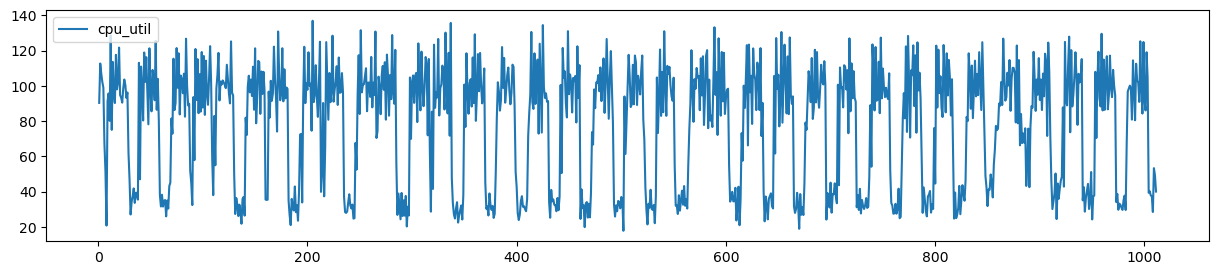

In [150]:
df = metrics["tensorflow-small"].cpu_util
df = df.loc[:, ~df.columns.duplicated()]
df.plot(figsize=(15,3))

<Axes: >

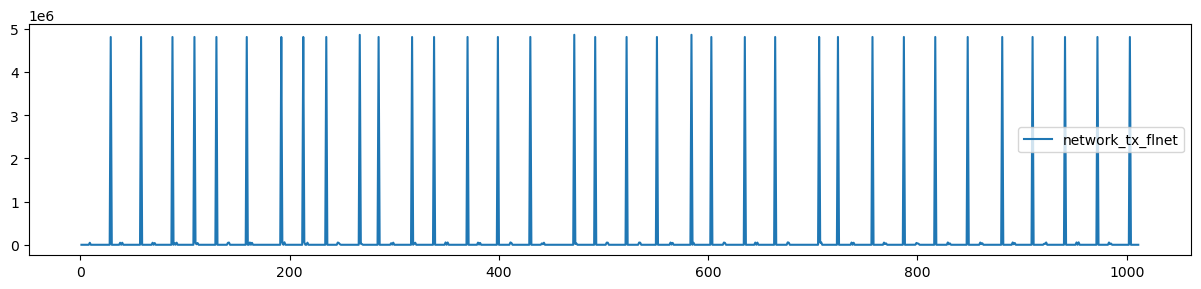

In [151]:
df = metrics["tensorflow-small"].network_tx_flnet.diff()
df = df.loc[:, ~df.columns.duplicated()]
df.plot(figsize=(15,3))

In [77]:
metrics["tensorflow-large"].network_rx_flnet

,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet,network_rx_flnet
0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0
1,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0
2,900.0,900.0,1341.0,942.0,816.0,1317.0,942.0,774.0,858.0,858.0,942.0,17871.0,1299.0,1257.0,858.0,774.0,858.0,858.0,858.0
3,1803.0,1803.0,1803.0,1845.0,1803.0,1737.0,1803.0,1803.0,1845.0,1446.0,1803.0,18333.0,1803.0,1803.0,1845.0,1803.0,1803.0,1803.0,1845.0
4,4871355.0,4870035.0,4891407.0,4831133.0,4870893.0,4880591.0,4865993.0,4866995.0,4836049.0,4856827.0,4812487.0,4883776.0,4832155.0,4868773.0,4873727.0,4882885.0,4864871.0,4856641.0,4844803.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,489635920.0,490286617.0,490411050.0,488822197.0,489722134.0,490259290.0,490311803.0,490284159.0,489743037.0,489842797.0,489738706.0,489700222.0,489934704.0,490333018.0,489883468.0,490188875.0,490276837.0,490014008.0,490422487.0
553,489635920.0,490286617.0,490411050.0,488822197.0,489722134.0,490259290.0,490311803.0,490284159.0,489743037.0,489842797.0,489738706.0,489700222.0,489934704.0,490333018.0,489883468.0,490188875.0,490276837.0,490014008.0,490422487.0
554,489635920.0,490286617.0,490411050.0,488822197.0,489722134.0,490259290.0,490311803.0,490284159.0,489743037.0,489842797.0,489738706.0,489700222.0,489934704.0,490333018.0,489883468.0,490188875.0,490276837.0,490014008.0,490422487.0
555,489635920.0,490286617.0,490411050.0,488822197.0,489722134.0,490259290.0,490311803.0,490284159.0,489743037.0,489842797.0,489738706.0,489700222.0,489934704.0,490333018.0,489883468.0,490188875.0,490276837.0,490014008.0,490422487.0


<AxesSubplot:>

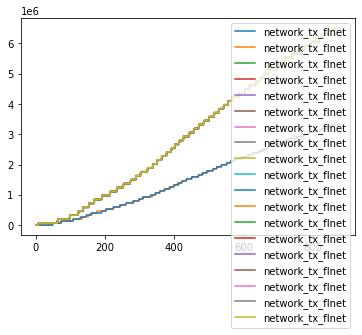

In [237]:
metrics[ 'sklearn-small' ].network_tx_flnet.plot()

<AxesSubplot:>

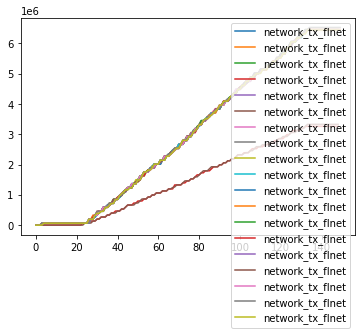

In [236]:
metrics[ 'sklearn-large' ].network_tx_flnet.plot()

<Axes: >

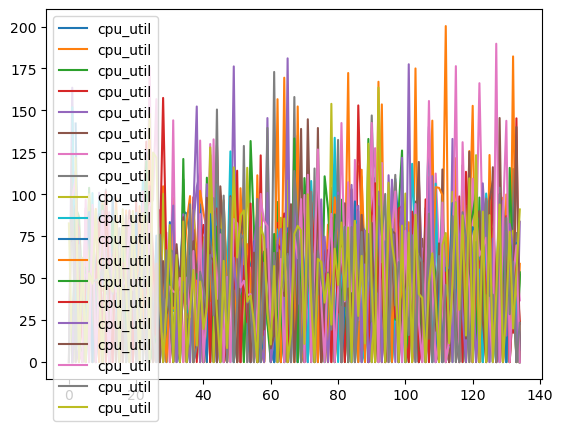

In [79]:
metrics['sklearn-large'].cpu_util[:].plot()

In [180]:
framework

'tensorflow-large'

In [50]:
metrics.keys()

dict_keys(['sklearn-small', 'sklearn-large', 'tensorflow-small', 'tensorflow-large'])

In [125]:
metrics['sklearn-small'].cpu_util[2:].mean(axis=1)

94.44782874984377

Text(0.5, 1.0, 'CPU Utilization')

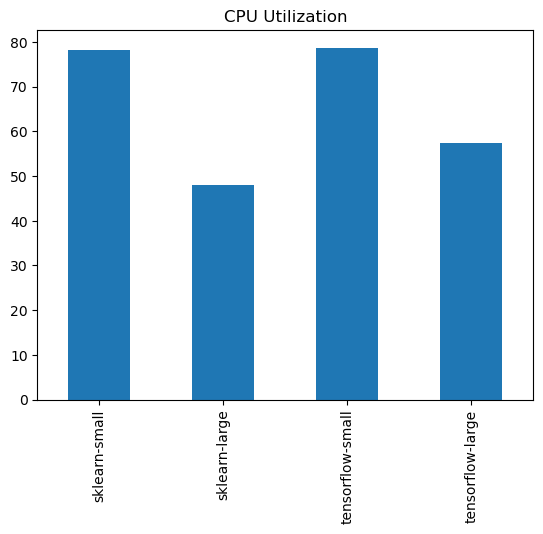

In [41]:
df=pd.concat([
    metrics['sklearn-small'].cpu_util[1:].mean(axis=1),
    metrics['sklearn-large'].cpu_util[1:].mean(axis=1),
    # metrics['sklearn-medium'].cpu_util[1:].mean(axis=1),
    metrics['tensorflow-small'].cpu_util[1:].mean(axis=1),
    metrics['tensorflow-large'].cpu_util[1:].mean(axis=1),
    # metrics['tensorflow-medium'].cpu_util[1:].mean(axis=1),

],axis=1)



df.columns = ['sklearn-small', 'sklearn-large','tensorflow-small', 'tensorflow-large']
ax = df.mean().plot.bar()
# plt.axhline(avg_cpu, c='r', ls='--')
ax.set_title("CPU Utilization")

In [34]:
metrics

{'sklearn-small': None,
 'sklearn-large': None,
 'tensorflow-small': None,
 'tensorflow-large': None}

In [24]:
df

,small,large,small,large
1,103.044733,103.634180,96.002115,79.000656
2,97.709144,61.285692,108.002469,74.623909
3,99.318199,30.562633,95.700809,36.477619
4,98.293664,30.531617,99.130388,24.505183
5,104.619630,41.894772,85.685349,71.091838
...,...,...,...,...
1013,NaN,NaN,32.213112,NaN
1014,NaN,NaN,63.773630,NaN
1015,NaN,NaN,55.900582,NaN
1016,NaN,NaN,98.859701,NaN


<Axes: >

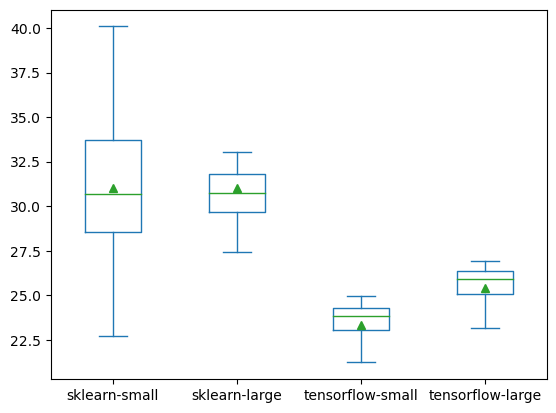

In [42]:
df=pd.concat([
    metrics['sklearn-small'].memory_util[1:].mean(axis=1),
    metrics['sklearn-large'].memory_util[1:].mean(axis=1),
    metrics['tensorflow-small'].memory_util[1:].mean(axis=1),
    metrics['tensorflow-large'].memory_util[1:].mean(axis=1),],axis=1)



df.columns = ['sklearn-small', 'sklearn-large','tensorflow-small', 'tensorflow-large']
df.plot.box(showfliers=False, showmeans=True,)

In [43]:
df=pd.concat([
    metrics['sklearn-small'].network_tx_flnet[:520].diff().mean(axis=1),
    metrics['sklearn-large'].network_tx_flnet.diff().mean(axis=1),
    metrics['tensorflow-small'].network_tx_flnet[:520].diff().mean(axis=1),
    metrics['tensorflow-large'].network_tx_flnet.diff().mean(axis=1),],axis=1)



df.columns = ['sklearn-small', 'sklearn-large','tensorflow-small', 'tensorflow-large']
df.mean()#.box(showfliers=False)

sklearn-small         6770.135483
sklearn-large        41085.780643
tensorflow-small    329491.312139
tensorflow-large    812620.459958
dtype: float64

In [80]:
metrics['sklearn-small'].network_tx_flnet

,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet,network_tx_flnet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,NaN,3322246.0,6525019.0,6506294.0,6494424.0,6495817.0,6505830.0,6503553.0,6502579.0,6495709.0,3318985.0,6513676.0,6508411.0,6500990.0,6503857.0,6511716.0,6500488.0,6506746.0,6518762.0
877,NaN,3322246.0,6525019.0,6506294.0,6494424.0,6495817.0,6505830.0,6503553.0,6502579.0,6495709.0,3318985.0,6513676.0,6508411.0,6500990.0,6503857.0,6511716.0,6500488.0,6506746.0,6518762.0
878,NaN,NaN,NaN,NaN,NaN,6495817.0,6505830.0,6503553.0,6502579.0,6495709.0,3318985.0,6513676.0,6508411.0,6500990.0,6503857.0,6511716.0,6500488.0,6506746.0,6518762.0
879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3318985.0,6513676.0,6508411.0,6500990.0,6503857.0,6511716.0,6500488.0,6506746.0,6518762.0


In [151]:
metrics['tensorflow-small'].network_tx_flnet.diff().sum()*0.000125

network_tx_flnet     618.745125
network_tx_flnet    1830.130125
network_tx_flnet    1830.390875
network_tx_flnet    1830.972125
network_tx_flnet    1810.174375
network_tx_flnet    1830.361125
network_tx_flnet     617.958000
network_tx_flnet    1830.137875
network_tx_flnet    1816.261875
network_tx_flnet    1829.392875
network_tx_flnet    1816.822375
network_tx_flnet    1828.479000
network_tx_flnet    1824.286625
network_tx_flnet    1830.747875
network_tx_flnet    1828.430125
network_tx_flnet    1824.666625
network_tx_flnet    1829.371125
network_tx_flnet    1826.168625
network_tx_flnet    1812.862875
dtype: float64

In [152]:
metrics['tensorflow-large'].network_tx_flnet.diff().sum()*0.000125

network_tx_flnet    5508.225375
network_tx_flnet    5520.544500
network_tx_flnet    2471.412000
network_tx_flnet    5476.954125
network_tx_flnet    5511.983875
network_tx_flnet    5511.592750
network_tx_flnet    5504.848125
network_tx_flnet    5518.425125
network_tx_flnet    5501.889500
network_tx_flnet    5514.487375
network_tx_flnet    2727.847500
network_tx_flnet    3668.724875
network_tx_flnet    5488.742250
network_tx_flnet    5508.063250
network_tx_flnet    5503.540500
network_tx_flnet    5520.087375
network_tx_flnet    5502.071875
network_tx_flnet    5500.031875
network_tx_flnet    5503.661250
dtype: float64

In [153]:
metrics['sklearn-large'].network_tx_flnet.diff().sum()*0.000125

network_tx_flnet    171.859500
network_tx_flnet    170.857250
network_tx_flnet    179.380875
network_tx_flnet     91.228125
network_tx_flnet    179.317000
network_tx_flnet     91.544500
network_tx_flnet    170.650250
network_tx_flnet    171.622750
network_tx_flnet    187.634125
network_tx_flnet    171.112250
network_tx_flnet    170.839500
network_tx_flnet    178.647125
network_tx_flnet    171.591250
network_tx_flnet    171.523750
network_tx_flnet    170.544500
network_tx_flnet    179.197375
network_tx_flnet    170.920875
network_tx_flnet    171.885750
network_tx_flnet    170.603125
dtype: float64

In [154]:
metrics['sklearn-small'].network_tx_flnet.diff().sum()*0.000125

network_tx_flnet    8.272500
network_tx_flnet    8.324500
network_tx_flnet    8.494750
network_tx_flnet    8.305500
network_tx_flnet    8.264250
network_tx_flnet    8.280750
network_tx_flnet    8.264250
network_tx_flnet    8.093875
network_tx_flnet    8.085625
network_tx_flnet    8.675750
network_tx_flnet    0.303250
network_tx_flnet    9.046000
network_tx_flnet    8.247750
network_tx_flnet    8.280750
network_tx_flnet    8.280750
network_tx_flnet    8.405750
network_tx_flnet    8.280750
network_tx_flnet    8.102125
network_tx_flnet    8.297250
dtype: float64

In [ ]:
metrics['tensorflow-large'].network_tx_flnet.diff()

In [44]:
df=pd.concat([
    metrics['sklearn-small'].network_rx_flnet[1:520],
    metrics['sklearn-large'].network_rx_flnet[1:],
    metrics['tensorflow-small'].network_rx_flnet[1:520],
    metrics['tensorflow-large'].network_rx_flnet[1:],],axis=1)

df.columns = ['sklearn-small', 'sklearn-large','tensorflow-small', 'tensorflow-large']
df.sum().plot(kind="bar")

ValueError: Length mismatch: Expected axis has 76 elements, new values have 4 elements

In [102]:
df.iloc[-1]

sklearn-small          67866.0
sklearn-large        1366313.0
tensorflow-small    14504391.0
tensorflow-large    44030778.0
Name: 49, dtype: float64

In [103]:
df.iloc[1]

sklearn-small        648.0
sklearn-large       1677.0
tensorflow-small     648.0
tensorflow-large     858.0
Name: 2, dtype: float64

In [ ]:
metrics['sklearn-small']

In [ ]:
accur[framework]

In [247]:
accur_sklearn
# accur_sklearn_20.accuracy.plot()

In [20]:
avg_cpu = 49.68291733764996
avg_train = 57.11989048399998

In [ ]:
accur_tensorflow.accuracy[:50].plot()
accur_tensorflow_20.accuracy.plot()

AttributeError: 'NoneType' object has no attribute 'accuracy'

Text(0.5, 1.0, 'Training Duration')

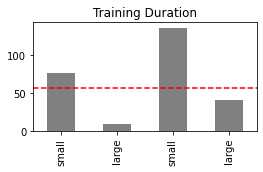

In [38]:
df=pd.concat([
    accur['sklearn-small'].train[1:].max(axis=1),
    # accur['sklearn-medium'].train[1:].mean(axis=1),
    accur['sklearn-large'].train[1:].max(axis=1),
    accur['tensorflow-small'].train[1:].max(axis=1),
    # accur['tensorflow-medium'].train[1:].mean(axis=1),
    accur['tensorflow-large'].train[1:].max(axis=1),],axis=1)



df.columns = ['small', 'large','small','large']
ax = df.mean().plot.bar(color='gray', figsize=(4,2))
plt.axhline(avg_train, c='r', ls='--')
ax.set_title("Training Duration")

In [150]:
accur['tensorflow-small']

,set_parameters,load_data,train,get_parameters,get_parameters_size,timestamp,test,prev_accuracy,accuracy,set_parameters,...,accuracy,set_parameters,load_data,train,get_parameters,get_parameters_size,timestamp,test,prev_accuracy,accuracy
0,0.000000,95.927752,100.269363,0.000000,296,2022-11-13 15:26:33.409359,NaN,NaN,NaN,0.000000,...,NaN,0.000000,96.497683,109.051375,0.000000,296,2022-11-13 15:26:42.216080,NaN,NaN,NaN
1,0.000000,0.759991,3.221575,0.000000,296,2022-11-13 15:26:49.555260,1.802313,0.678,0.678,0.000000,...,0.664,0.000000,0.724599,3.706165,0.000000,296,2022-11-13 15:26:50.043697,2.193254,0.664,0.664
2,0.000000,0.733503,2.507918,0.000000,296,2022-11-13 15:27:01.148505,1.708222,0.772,0.772,0.000000,...,0.740,0.000000,0.687139,3.519013,0.000000,296,2022-11-13 15:27:02.178349,1.662394,0.788,0.788
3,0.000000,0.701915,2.821902,0.000000,296,2022-11-13 15:27:11.351861,1.333813,0.830,0.830,0.000000,...,0.816,0.000000,0.778704,3.075246,0.000000,296,2022-11-13 15:27:11.601461,1.350715,0.808,0.808
4,0.000000,0.872849,5.078951,0.000000,296,2022-11-13 15:27:27.331751,1.891106,0.838,0.838,0.000000,...,0.816,0.000000,0.962550,3.686066,0.000000,296,2022-11-13 15:27:25.937760,1.738477,0.826,0.826
5,0.000000,0.862164,3.893160,0.000000,296,2022-11-13 15:27:38.630019,2.695917,0.834,0.834,0.000000,...,0.822,0.000000,0.874615,3.304283,0.000000,296,2022-11-13 15:27:38.089109,2.155482,0.828,0.828
6,0.000000,0.694419,3.632232,0.000000,296,2022-11-13 15:27:50.954567,1.848383,0.850,0.850,0.000000,...,0.832,0.000364,0.874200,3.004243,0.001884,296,2022-11-13 15:27:50.317505,1.667282,0.844,0.844
7,0.000000,0.708017,3.402570,0.000000,296,2022-11-13 15:28:02.661070,1.922890,0.850,0.850,0.000000,...,0.822,0.000000,0.758802,6.236883,0.000000,296,2022-11-13 15:28:05.500803,1.903907,0.844,0.844
8,0.000000,0.984159,5.083881,0.000000,296,2022-11-13 15:28:14.026312,1.770715,0.864,0.864,0.000000,...,0.838,0.000000,0.818574,3.623791,0.000000,296,2022-11-13 15:28:12.578246,1.806131,0.846,0.846
9,0.000393,0.734273,4.773899,0.000000,296,2022-11-13 15:28:23.810512,1.586532,0.852,0.852,0.000000,...,0.830,0.000000,0.824018,3.521985,0.000000,296,2022-11-13 15:28:22.548984,1.787255,0.858,0.858


<AxesSubplot:>

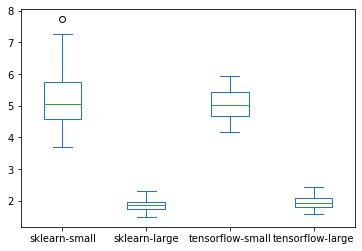

In [109]:
df=pd.concat([
    accur['sklearn-small'].test[1:].mean(axis=1),
    # accur['sklearn-medium'].test[1:].mean(axis=1),
    accur['sklearn-large'].test[1:].mean(axis=1),
    accur['tensorflow-small'].test[1:].mean(axis=1),
    # accur['tensorflow-medium'].test[1:].mean(axis=1),
    accur['tensorflow-large'].test[1:].mean(axis=1),],axis=1)



df.columns = ['sklearn-small', 'sklearn-large','tensorflow-small','tensorflow-large']
df.plot.box()

<AxesSubplot:>

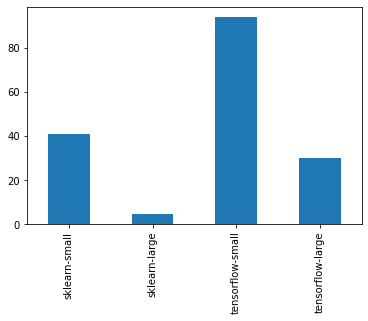

In [213]:
df=pd.concat([
    accur['sklearn-small'].train[1:].mean(axis=1),
    # accur['sklearn-medium'].test[1:].mean(axis=1),
    accur['sklearn-large'].train[1:].mean(axis=1),
    accur['tensorflow-small'].train[1:].mean(axis=1),
    # accur['tensorflow-medium'].test[1:].mean(axis=1),
    accur['tensorflow-large'].train[1:].mean(axis=1),],axis=1)



df.columns = ['sklearn-small', 'sklearn-large','tensorflow-small','tensorflow-large']
df.mean().plot.bar()

In [214]:
df=pd.concat([
    accur['sklearn-MNIST'].test.mean(axis=1),
    accur['sklearn-MNIST-20'].test.mean(axis=1),
    accur['tensorflow-MNIST'].test.mean(axis=1),
    accur['tensorflow-MNIST-20'].test.mean(axis=1)],axis=1)
df.columns = ["30 sklearn","20 sklearn", "30 tensorflow","20 tensorflow"]
df.plot.box()

KeyError: 'sklearn-MNIST'

In [ ]:
df=pd.concat([accur_sklearn.train[1:50],accur_sklearn_20.train[1:], accur_tensorflow.train[1:50], accur_tensorflow_20.train[1:]],axis=1)
df.columns = ["30 sklearn","20 sklearn", "30 tensorflow","20 tensorflow"]

<AxesSubplot:>

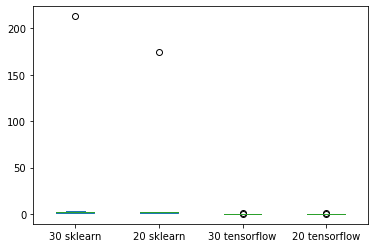

In [85]:
df=pd.concat([
    accur['sklearn-MNIST'].load_data.mean(axis=1),
    accur['sklearn-MNIST-20'].load_data.mean(axis=1),
    accur['tensorflow-MNIST'].load_data.mean(axis=1),
    accur['tensorflow-MNIST-20'].load_data.mean(axis=1)],axis=1)
df.columns = ["30 sklearn","20 sklearn", "30 tensorflow","20 tensorflow"]
df.plot.box()

In [86]:
accur['sklearn-MNIST-20']

,set_parameters,load_data,train,get_parameters,get_parameters_size,timestamp,test,prev_accuracy,accuracy,set_parameters,...,accuracy,set_parameters,load_data,train,get_parameters,get_parameters_size,timestamp,test,prev_accuracy,accuracy
0,0,178.354780,189.152463,0.000000,296,2022-11-06 06:51:31.177299,NaN,NaN,NaN,0.000000,...,NaN,0.000000,178.203355,190.813835,0,296,2022-11-06 06:51:32.883197,NaN,NaN,NaN
1,0,2.338481,7.801373,0.000000,296,2022-11-06 06:51:49.113363,6.935050,0.678,0.678,0.000000,...,0.664,0.000000,2.749388,6.952041,0,296,2022-11-06 06:51:48.277060,6.499119,0.664,0.664
2,0,1.488286,4.870612,0.000000,296,2022-11-06 06:52:00.793325,3.084589,0.772,0.772,0.000000,...,0.740,0.000000,1.525452,4.194521,0,296,2022-11-06 06:52:00.115271,2.997441,0.788,0.788
3,0,1.028771,3.373536,0.000000,296,2022-11-06 06:52:09.605041,1.927159,0.830,0.830,0.000000,...,0.816,0.000000,1.015341,2.957580,0,296,2022-11-06 06:52:09.192322,1.883810,0.808,0.808
4,0,1.563726,6.527360,0.000000,296,2022-11-06 06:52:21.960167,1.845360,0.838,0.838,0.000000,...,0.816,0.000000,1.934270,6.515148,0,296,2022-11-06 06:52:21.949969,1.795472,0.826,0.826
5,0,1.206227,3.408700,0.000000,296,2022-11-06 06:52:36.120932,2.893421,0.834,0.834,0.000000,...,0.822,0.000000,0.870808,3.262652,0,296,2022-11-06 06:52:36.002789,2.414340,0.828,0.828
6,0,1.974512,4.388212,0.000000,296,2022-11-06 06:52:47.422962,2.520014,0.850,0.850,0.000000,...,0.832,0.000000,2.039623,7.932526,0,296,2022-11-06 06:52:50.968773,2.489024,0.844,0.844
7,0,2.172058,5.107985,0.000000,296,2022-11-06 06:53:01.251196,4.374270,0.850,0.850,0.000000,...,0.822,0.000000,2.370287,7.367377,0,296,2022-11-06 06:53:03.491942,4.344776,0.844,0.844
8,0,1.695023,5.774624,0.070340,296,2022-11-06 06:53:15.892657,3.656093,0.864,0.864,0.000000,...,0.838,0.000000,1.475266,6.370670,0,296,2022-11-06 06:53:16.477198,3.667586,0.846,0.846
9,0,2.349872,10.783414,0.000000,296,2022-11-06 06:53:40.696060,4.933165,0.852,0.852,0.000000,...,0.830,0.000000,2.388662,6.859321,0,296,2022-11-06 06:53:36.693786,5.075346,0.858,0.858


In [173]:

accur_tensorflow.train[1:50].plot()
accur_tensorflow_20.train[1:].plot()

AttributeError: 'NoneType' object has no attribute 'train'